In [10]:
# Dynamical System
# Author: Zhang Su (Teaching Assistant)
# Using python3, numpy, matplotlib.
# 23 June 2020

# Learning Outcome

By the end of this material, you should be able to:

+ Calculate $A^k$ by exploiting eigenvalue decomposition.
+ Explain the advantage of calculating $A^k$ using EVD over brute force.


Note: 
1. If you occasionally double clicked a textual cell, the display would change to markdown source code. To reverse, simply click anywhere of that markdown cell,  and then click **Run** in the top manu.
2. Sometimes the notebook may not be responding. That is caused by the failure of jupyter kernel. To repair, try clicking **Kernel** in the top manu, then clicking **Reconnect**. 
3. Section Takeaways summarizes useful tips, e.g., holes of Python to avoid, if any.
4. Section Practice reflect the learning outcomes. You are expected to solve them based on your understanding on the lecture notes alone with the coding skills learned from this demo.

## If you just opened the demo, please manually run the cell one-by-one to show the animation correctly!

# Table of contents <a name="Table_of_Content"></a>
+ [Calculating $A^k$ with Eigenvalue Decomposition](#CED)
+ [Finding Trajectory by Repeated Transformation (Brute Force)](#BF)
+ [Finding Trajectory by Repeated Transformation (EVD)](#EVC)
+ [Example](#Example)
+ [Practice](#Practice)


In [11]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib import cm
from pylab import *
%matplotlib notebook

np.set_printoptions(suppress=True) # To suppress the scientific notation of Q when printing.
# You may ignore the warnings.

### Calculating $A^k$ with Eigenvalue Decomposition<a name="CED"></a>
[Return to Table of Content](#Table_of_Content)

Given a linear transformation $A$, by carrying out the eigen decomposition and simple matrix algebra we obtain:

$$
\begin{align}
A&=PDP^{-1}\\
A^2&=PDP^{-1}PDP^{-1}=PD(P^{-1}P)DP^{-1}=PD^2P^{-1}\\
\ldots\\
A^n&=PD^nP^{-1}
\end{align}
$$

In [12]:
A = np.array([[2, 1],
             [1, 2]], dtype=float)

D_diag, P = la.eig(A)
D = np.diag(D_diag)
print("The eigenvalues D are \n", D.round(4))
print("The eigenvectors P are \n", P.round(4))

# A^n, left hand side
A2 = A.dot(A)
A10 = la.matrix_power(A, 10)

# PD^nP^-1, right hand side
A_PDP = P.dot(D).dot(la.inv(P))
A2_PDP = P.dot(D.dot(D)).dot(la.inv(P))
A10_PDP = P.dot(la.matrix_power(D, 10)).dot(la.inv(P))

# Examine the equality
print("A = \n", A, "\n")
print("PDP^-1 = \n", A_PDP, "\n")
print("A^2 = \n", A2, "\n")
print("PD^2P^-1 = \n", A2_PDP, "\n")
print("A^10 = \n", A10, "\n")
print("PD^10P^-1 = \n", A10_PDP)

The eigenvalues D are 
 [[3. 0.]
 [0. 1.]]
The eigenvectors P are 
 [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
A = 
 [[2. 1.]
 [1. 2.]] 

PDP^-1 = 
 [[2. 1.]
 [1. 2.]] 

A^2 = 
 [[5. 4.]
 [4. 5.]] 

PD^2P^-1 = 
 [[5. 4.]
 [4. 5.]] 

A^10 = 
 [[29525. 29524.]
 [29524. 29525.]] 

PD^10P^-1 = 
 [[29525. 29524.]
 [29524. 29525.]]


We can see that $A^n$ and $VD^nV^{-1}$ are equivalent transformation. In this demo we will take advantage of them to calculate the trajectory of dynamical system!

### Finding Trajectory by Repeated Transformation (Brute Force)<a name="BF"></a>
[Return to Table of Content](#Table_of_Content)

Given a transformation $A$ and a vector $x_0$, the goal is to calculate the trajectory formed by $\{x_0, x_1, x_2, \ldots, x_k\}$, where $x_k=Ax_{k-1}$. 

This method is called **brute force**, because we use the entire $A$ for calculation, which can be computationally expensive if $A$ has large size in practical problems. The example and plot is shown below.

The eigenvalues D are 
 [[0.8  0.  ]
 [0.   0.64]]
The eigenvectors P are 
 [[1. 0.]
 [0. 1.]]


<IPython.core.display.Javascript object>


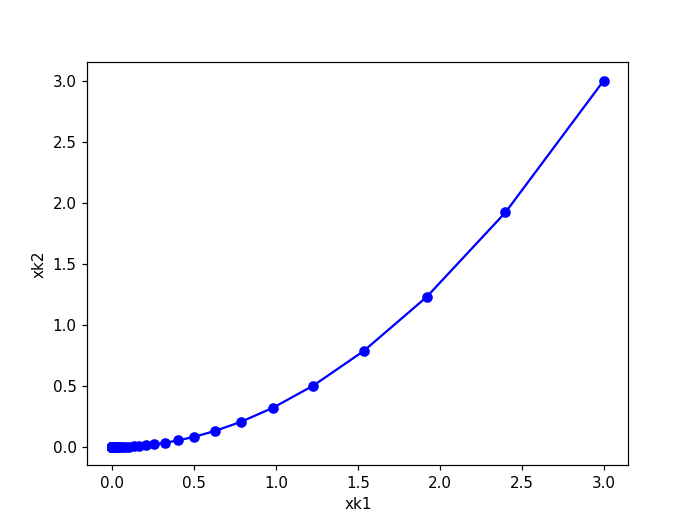

In [13]:
A = np.array([[0.8, 0],
             [0, 0.64]], dtype=float)

D_diag, V = la.eig(A)
D = np.diag(D_diag)

print("The eigenvalues D are \n", D)
print("The eigenvectors P are \n", V)

# Use x_set to store x_0, x_1, ..., x_k, totally 100 entries.
x0 = np.array([3, 3], dtype=float).T
N = 100
x_set = np.zeros((2,N))
x_set[:,0] = x0

# Calcuate x_1, x_2, ..., x_k one by one and store in x_set
for k in range(N):
    if k > 0:
        x_k = x_set[:, k-1]
        x_set[:, k] = A.dot(x_k)
        
plt.figure()
plt.plot(x_set[0, :], x_set[1, :] ,'b-o')
plt.xlabel('xk1')
plt.ylabel('xk2')
plt.show()

### Finding Trajectory by Repeated Transformation (EVD)<a name="EVD"></a>
[Return to Table of Content](#Table_of_Content)

Instead of using the brute force, we can exploit the eigenvalues $D$ and eigenvectors $P$ to simplify the computation.

The viability is explained as follows. We assume that $A$ is diagonalizable, with n linearly independent eigenvectors, $v_1, v_2, \ldots, v_n$, and corresponding eigenvalues, $\lambda_1\geq \lambda_2\geq\ldots\geq \lambda_n$. Since $\{v_1, v_2, \ldots, v_n\}$ is a basis for $\mathbb{R}^n$, any initial vector $x_0$ can be written uniquely as

$$
\begin{align}
x_0&=c_1v_1+c_2v_2+\cdots+c_nv_n \\
x_1&=Ax_0=c_1Ap_1+c_2Ap_2+\cdots+c_nAp_n=c_1\lambda_1v_1+c_2\lambda_2v_2+\cdots+c_n\lambda_nv_n\\
\ldots\\
x_k&=c_1(\lambda_1)^kv_1+c_2(\lambda_2)^kv_2+\cdots+c_n(\lambda_n)^kv_n=\sum_{i=1}^nc_i\lambda_i^kv_i \tag{1}
\end{align}
$$

where $k=0,1,2,\ldots$.

To obtain $c$, we simply calculate:

$$
\begin{align}
x_0 &= Vc,\\
c &= V^{-1}x_0 \tag{2}.
\end{align}
$$

The example and plot is shown below.

The eigenvalues D are 
 [[0.8  0.  ]
 [0.   0.64]]
The eigenvectors P are 
 [[1. 0.]
 [0. 1.]]


<IPython.core.display.Javascript object>


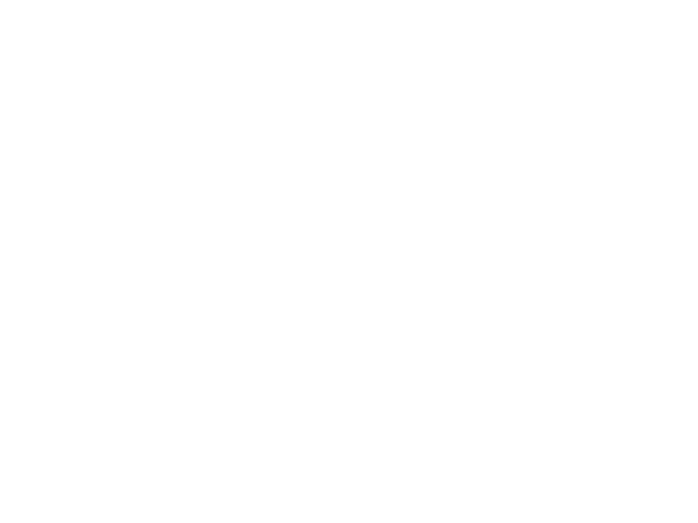

In [14]:
A = np.array([[0.8, 0],
             [0, 0.64]], dtype=float)

D_diag, V = la.eig(A)
D = np.diag(D_diag)

print("The eigenvalues D are \n", D)
print("The eigenvectors P are \n", V)

x0 = np.array([3, 3], dtype=float).T

### Calculate c following Eq. 2 ####
c = la.inv(V).dot(x0)

N = 100
x_set = np.zeros((2,N))
x_set[:,0] = x0


### Calculate x_k following Eq. 1 #####

for k in range(N):
    if k > 0:
        x_set[:, k] = c[0]*np.power(D[0,0], k-1)*V[:,0] + c[1]*np.power(D[1,1], k-1)*V[:,1]
        
########################################


plt.figure()
plt.plot(x_set[0, :], x_set[1, :] ,'b-o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

We can observe that the initial $x_0$ is somehow attracted to the origin. Actually, the origin is called an attractor of the dynamical system because all trajectories tend toward $\mathbf{0}$. This occurs whenever both eigenvalues are less than 1 in magnitude.

### Example<a name="Example"></a>
[Return to Table of Content](#Table_of_Content) 

Now suppose that we are given a lot of $x$, having $X=\{x_1, x_2, x_3, \ldots, x_n\}$. By converting Eq. (1) to a matrix form, we can always calculate $X$ in one go:

$$
X_k = CD^kV^T, \tag{3}
$$

where $X$ is an $N\times 2$ matrix, and 

$$
C=X(V^{-1})^T \tag{4}
$$

is an corresponding $N\times 2$ coefficient matrix.

An animation for multiple points $X$ are shown below.

<IPython.core.display.Javascript object>


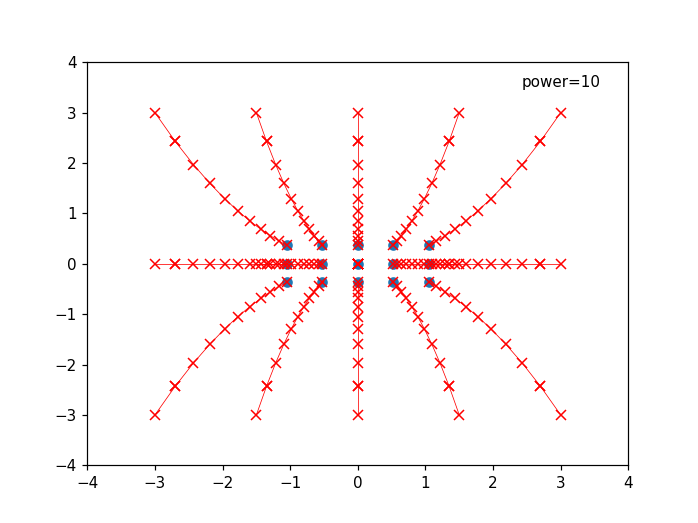

In [15]:
# Eigen decomposition of A
A = np.array([[0.9, 0],
         [0, 0.81]], dtype=float)

D_diag, V = la.eig(A)
D = np.diag(D_diag)

# Create the grid, store as a N by 2 matrix X
x1, x2 = np.mgrid[slice(-3, 4.5, 1.5),
             slice(-3, 6, 3)]
X = np.c_[x1.flatten(), x2.flatten()]


# Calculate all the c together following Eq. 4
C = la.inv(V).dot(X.T).T

plt.close() # This is to close other interactive plots, or the animation will glitch!

################ Initiate the plot #####################
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

scat = ax.scatter(x_set[:,0], x_set[:,1])
txt = ax.text(3,3.5,'power=[]', horizontalalignment='center')

# points_x and points_y are two nested empty lists.
lines, points_x, points_y = [], [[] for _ in range(N)], [[] for _ in range(N)] # Useful List Comprehensions


# lines contain N line, each of which is to plot the trajectory for one point in x_set
for i in range(X.shape[0]):
    line = ax.plot([],[],'r-x', lw=0.5)[0]
    lines.append(line)
    points_x[i].append(X[i, 0])
    points_y[i].append(X[i, 1])
    
################ Initiate the plot done ######################

# To pass to the animation API
fargs = [X, V, D, C, points_x, points_y]
    
def update(i, *fargs):
    # Get the original variables
    X, V, D, C, points_x, points_y = fargs
    

    # Calculate all the N new x all together following Eq. 3
    Xk = C.dot(la.matrix_power(D, i+1)).dot(V.T)
    
    # Update all the plot objects
    scat.set_offsets(Xk)
    string = 'power={}'.format((i+1))
    txt.set_text(string)
    
    for i, line in enumerate(lines):
        points_x[i].append(Xk[i, 0])
        points_y[i].append(Xk[i, 1])
        line.set_data(points_x[i], points_y[i])
        
    return [scat, txt, tuple(lines)]


fig.canvas.draw()
ani = anime.FuncAnimation(fig, update, fargs=fargs, interval=500)

### Practice<a name="Practice"></a>
[Return to Table of Content](#Table_of_Content) 

1. Define a routine `Ak = my_power(A, k)` by encapsulating relevant code from this demo, which calculates the power by $A^k=PD^kP^{-1}$ using the EVD.